# Identify cause of excess sea ice formation on the Weddell Sea continental shelf

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
import cmocean
sys.path.append('/home/users/birgal/')

In [2]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
run_dir  = f'{base_dir}output/'

In [3]:
mesh_mask = xr.open_dataset(f'{base_dir}bathymetry/mesh_mask-20250715.nc').squeeze().rename({'nav_lev':'deptht'})

In [7]:
year=1983
ds_era  = xr.open_dataset(f'{run_dir}ERA5_1h_tune0_efr020/files1/eANT025.L121_1m_{year}0101_{year}1231_icemod_compressed.nc')
ds_base = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
# ds_2000 = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979_restart2000/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')
ds_era_wind = xr.open_dataset(f'{run_dir}CESM2_3hwind_1979_ERA5_winds/files0/eANT025.L121_1m_{year}0101_{year}1231_icemod.nc')

Text(0.5, 1.0, '')

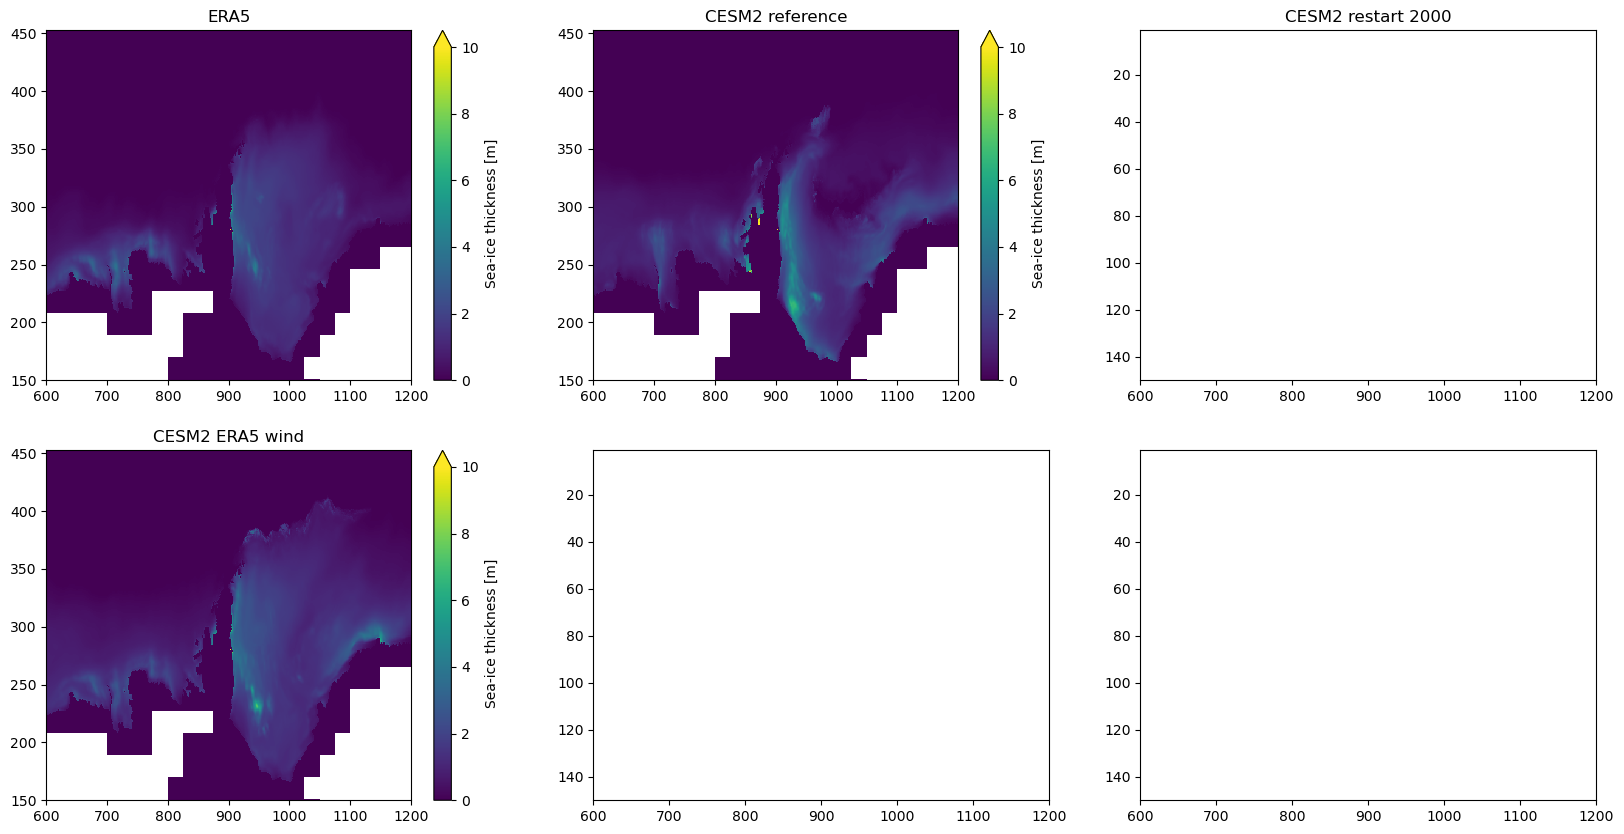

In [8]:
var='sithic'
kwags = {'vmin':0, 'vmax':10}
fig, ax =plt.subplots(2,3, figsize=(20,10))
ds_era[var].isel(time_counter=5).plot(ax=ax[0,0], **kwags)
ds_base[var].isel(time_counter=5).plot(ax=ax[0,1], **kwags)
# ds_2000[var].isel(time_counter=5).plot(ax=ax[0,2], **kwags)
ds_era_wind[var].isel(time_counter=5).plot(ax=ax[1,0], **kwags)
# ds_ssr[var].isel(time_counter=5).plot(ax=ax[1,1], **kwags)
# ds_rnf[var].isel(time_counter=5).plot(ax=ax[1,2], **kwags)

for axis in ax.ravel():
    axis.set_xlabel(''); axis.set_ylabel('')
    axis.set_ylim(150,None)
    axis.set_xlim(600,1200)

ax[0,0].set_title('ERA5')
ax[0,1].set_title('CESM2 reference')
ax[0,2].set_title('CESM2 restart 2000')
ax[1,0].set_title('CESM2 ERA5 wind')
ax[1,1].set_title('')
ax[1,2].set_title('')